# 04_27 과제
<pre>
1. 당뇨병 데이터(다중회귀)
    - LR, SVR, RFR, XGR
2. 유방암 데이터(차원축소 / 군집화)
    - 10, 5, 2 차원으로 차원축소
    - 원본과 차원축소한 데이터의 분류(앙상블) 정확도 측정
    - 군집화하기
    - 2차원으로 축소한 것은 시각화(오리지날, 군집 데이터)
</pre>
별도의 폴더에 본인이름.html 파일 두개를 만들어서 각각 제출하세요.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df_cac = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_cac['target'] = cancer.target
df_cac.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.2, random_state=2000
)

In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)
cancer.data.shape

(569, 30)

## 1. 차원축소

- 10차원

In [ ]:
from sklearn.decomposition import PCA
pca10_cac = PCA(n_components=10)
cancer_pca10_cac = pca10_cac.fit_transform(cancer_std)
print(cancer_pca10_cac[:5])
print(f'주성분 비율(10차원): {pca10_cac.explained_variance_ratio_}\n주성분 합계(10차원): {pca10_cac.explained_variance_ratio_.sum()}')

[[ 9.19283683  1.94858307 -1.12316617  3.63373091 -1.19511016  1.41142441
   2.15936842 -0.39841472 -0.15711396 -0.87739609]
 [ 2.3878018  -3.76817174 -0.52929269  1.11826387  0.62177498  0.02865635
   0.0133588   0.24099428 -0.71190718  1.10698463]
 [ 5.73389628 -1.0751738  -0.55174759  0.91208267 -0.1770859   0.54145215
  -0.66816691  0.09737125  0.02406666  0.45428107]
 [ 7.1229532  10.27558912 -3.23278955  0.15254702 -2.96087838  3.05342186
   1.42991095  1.05956493 -1.40544102 -1.11696811]
 [ 3.93530207 -1.94807157  1.38976673  2.94063934  0.54674741 -1.22649464
  -0.93621224  0.63637691 -0.26380583  0.37770279]]
주성분 비율(10차원): [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]
주성분 합계(10차원): 0.951568814330481


- 5차원

In [ ]:
pca5_cac = PCA(n_components=5)
cancer_pca5_cac = pca5_cac.fit_transform(cancer_std)
print(cancer_pca5_cac[:5])
print(f'주성분 비율(5차원): {pca5_cac.explained_variance_ratio_}\n주성분 합계(5차원): {pca5_cac.explained_variance_ratio_.sum()}')

[[ 9.19283683  1.94858305 -1.12316491  3.63373152 -1.19510894]
 [ 2.38780179 -3.76817174 -0.52929328  1.11826357  0.62177441]
 [ 5.73389628 -1.07517379 -0.55174766  0.91208277 -0.17708602]
 [ 7.1229532  10.27558912 -3.23278938  0.15254686 -2.96087812]
 [ 3.93530207 -1.94807156  1.38976644  2.94063928  0.54674712]]
주성분 비율(5차원): [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768]
주성분 합계(5차원): 0.8473427431680627


- 2차원

In [ ]:
pca2_cac = PCA(n_components=2)
cancer_pca2_cac = pca2_cac.fit_transform(cancer_std)
print(cancer_pca2_cac[:5])
print(f'주성분 비율(2차원): {pca2_cac.explained_variance_ratio_}\n주성분 합계(2차원): {pca2_cac.explained_variance_ratio_.sum()}')

[[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]
 [ 7.1229532  10.27558912]
 [ 3.93530207 -1.94807157]]
주성분 비율(2차원): [0.44272026 0.18971182]
주성분 합계(2차원): 0.6324320765155943


## 2.원본과 차원축소한 데이터의 분류(앙상블) 정확도 측정 - PCA 전후 비교

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.2, random_state=2000
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 원본 데이터
rfc = RandomForestClassifier(random_state=2000)
rfc.fit(X_train, y_train)
data_1 = rfc.score(X_test, y_test)

# 10차원 축소한 데이터
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca10_cac, cancer.target, test_size=0.2, random_state=2000
)
rfc10 = RandomForestClassifier(random_state=2000)
rfc10.fit(X_train, y_train)
data_2 = rfc10.score(X_test,y_test)

# 5차원 축소한 데이터
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca5_cac, cancer.target, test_size=0.2, random_state=2000
)
rfc5 = RandomForestClassifier(random_state=2000)
rfc5.fit(X_train, y_train)
data_3 = rfc5.score(X_test,y_test)

# 2차원 축소한 데이터
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca2_cac, cancer.target, test_size=0.2, random_state=2000
)
rfc2 = RandomForestClassifier(random_state=2000)
rfc2.fit(X_train, y_train)
data_4 = rfc2.score(X_test,y_test)

print(f'원본 정확도 : {data_1}\n10차원 정확도: {data_2}\n5차원 정확도: {data_3}\n2차원 정확도: {data_4}')

원본 정확도 : 0.9298245614035088
10차원 정확도: 0.9473684210526315
5차원 정확도: 0.9473684210526315
2차원 정확도: 0.9298245614035088


## 3. 군집화

In [ ]:
len(df_cac.columns)

31

In [ ]:
from sklearn.cluster import KMeans
cancer = load_breast_cancer()
cancer_std = StandardScaler().fit_transform(cancer.data)

pca = PCA(n_components=2)
cancer_pca = pca.fit_transform(cancer_std)

kmeans = KMeans(n_clusters=31, random_state=2000)
kmeans.fit(cancer.data)
kmeans.labels_
np.unique(kmeans.labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
       dtype=int32),
 array([ 7, 38, 14, 44,  2, 16, 20,  1, 48, 58, 18,  2,  1,  4, 64,  2,  3,
        10,  4, 21, 35, 13, 19,  2,  5,  9,  3, 17, 53, 23, 13]))

In [ ]:
df = pd.DataFrame({
    'PC1': cancer_pca[:, 0], 'PC2': cancer_pca[:, 1],
    'target': cancer.target, 'cluster': kmeans.labels_
})
df.head()

,PC1,PC2,target,cluster
0,9.192837,1.948583,0,13
1,2.387802,-3.768172,0,0
2,5.733896,-1.075174,0,27
3,7.122953,10.275589,0,14
4,3.935302,-1.948072,0,27


## 4. 2차원 축소 시각화

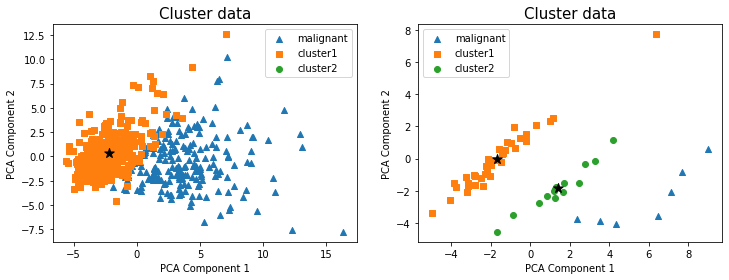

In [ ]:
# 시각화... 아직 잘 모르겠습니다. ㅠㅠ


markers = ['^', 's', 'o']
plt.figure(figsize=(12, 4))
for i, column in enumerate(['target', 'cluster']):
    plt.subplot(1, 2, i+1)
    for i, marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        if i == 0:
            plt.title('Original data', fontsize=15)
            plt.scatter(x_data, y_data, marker=marker, label=cancer.target_names[i])
        else:
            plt.title('Cluster data', fontsize=15)
            plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))
            plt.scatter(x_data.mean(), y_data.mean(), marker='*', c='black', s=100)
    plt.legend()
    plt.xlabel('PCA Component 1'), plt.ylabel('PCA Component 2')
plt.show()